## Notebook 7: Algoritmo Random Forest

Este notebook está basado en el <a href="https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/"> tutorial</a> propuesto por <a href="https://twitter.com/usman_malikk"> Usman Malik</a>.

<b>Random forest</b> es un tipo de algoritmo de aprendizaje supervisado de máquinas basado en el aprendizaje de conjuntos (Ensemble Learning). <b>Ensemble Learning</b> es un tipo de aprendizaje en el que se unen diferentes tipos de algoritmos o el mismo algoritmo varias veces para formar un modelo de predicción más potente. El algoritmo Random Forest combina múltiples árboles de decisión, dando como resultado un bosque de árboles, de ahí el nombre "Random Forest". Random Forest puede utilizarse tanto para tareas de <b>regresión</b> como de <b>clasificación</b>. 

### 1. ¿Cómo funciona el algoritmo Random Forest?

Random Forest se divide en 3 pasos básicos:

- Seleccione N registros aleatorios del conjunto de datos.
- Construya un árbol de decisión basado en estos registros N. (ver <i>Notebook 6</i>)
- Elija el número de árboles que desee en su algoritmo y repita los pasos 1 y 2.

En caso de un <b>problema de regresión</b>, para una nueva observación, cada árbol en el bosque predice un valor para Y (salida). El valor final puede ser calculado tomando el promedio de todos los valores pronosticados por todos los árboles en el bosque. 

En caso de un <b>problema de clasificación</b>, cada árbol del bosque predice la categoría a la que pertenece la nueva observación. Finalmente, la nueva observación se asigna a la categoría que gana la mayoría de los votos.

### 2. Ventaja y Desventaja de usar Random Forest

Los bosques aleatorios son un método poderoso con varias ventajas:

- Tanto el entrenamiento como la predicción son muy rápidos, debido a la simplicidad de los árboles de decisión subyacentes. Además, ambas tareas pueden ser directamente paralelizadas, ya que los árboles individuales son entidades totalmente independientes.
- Los múltiples árboles permiten una clasificación probabilística: un voto mayoritario entre los estimadores da una estimación de la probabilidad (accedido en Scikit-Learn con el método predict_proba()).

Una desventaja principal de los bosques aleatorios es que los resultados no son fácilmente interpretables: es decir, si se desea sacar conclusiones sobre el significado del modelo de clasificación, los bosques aleatorios pueden no ser la mejor opción.


### 3. Ejemplo de Uso de Random Forest para la regresión

En esta sección estudiaremos cómo los bosques aleatorios pueden ser utilizados para resolver problemas de regresión usando Scikit-Learn. En la siguiente sección resolveremos el problema de la clasificación a través de bosques aleatorios.

#### Definición del problema

El problema aquí es predecir el consumo de gasolina (en millones de galones) en 48 de los estados de los EE.UU. basado en el impuesto a la gasolina (en centavos), el ingreso per cápita (dólares), las carreteras pavimentadas (en millas) y la proporción de la población con la licencia de conducir.

#### Solución

Para resolver este problema de regresión usaremos el algoritmo de bosque aleatorio a través de la biblioteca Scikit-Learn Python. Seguiremos el proceso de aprendizaje tradicional de la máquina para resolver este problema.

#### a - Importar y Preparar el dataset

In [1]:
# CARGAR EL DATASET

import pandas as pd  
import numpy as np 

dataset = pd.read_csv('petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


La primera tarea es dividir los datos en conjuntos de'atributos' y'etiquetas'.

In [2]:
#Dividir Features y Labels
X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values

Finalmente, dividamos los datos en conjuntos de entrenamiento y pruebas:

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### b - Entrenamiento

In [4]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=1)  
regressor.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

La clase <code>RandomForestRegressor</code> de la biblioteca <code>sklearn.ensemble</code> se utiliza para resolver problemas de regresión. El parámetro más importante de la clase <code>RandomForestRegressor</code> es el parámetro <code>n_estimators</code>. Este parámetro define el número de árboles en el bosque aleatorio. Comenzaremos con <code>n_estimator=20</code> para ver cómo funciona nuestro algoritmo. Puede encontrar detalles de todos los parámetros de RandomForestRegressor <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">aquí</a>.


#### c - Evaluación del modelo Random Forest

Para los problemas de regresión, las métricas frecuentemente utilizadas para evaluar un modelo son el error absoluto medio, el error al cuadrado medio y el error al cuadrado medio de la raíz.

In [5]:
y_pred = regressor.predict(X_test)  

In [6]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 47.864999999999995
Mean Squared Error: 3422.699249999999
Root Mean Squared Error: 58.50383961758407


<b>Consultas</b>:
- ¿Cuál valor de <code>n_estimator</code> permite optimizar el RMSE?
- Crear un grafíco que permita visualizar el RMSE obtenido según el <code>n_estimator</code>?

In [21]:
itera = 25
arreglo_iterations = [j for j in range(itera)]
arreglo_rmse = []
for lbl in range(itera):
    regressor = RandomForestRegressor(n_estimators=lbl+1, random_state=1)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    arreglo_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

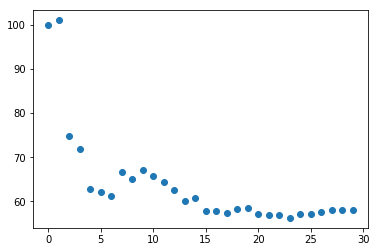

In [20]:
import matplotlib.pyplot as plt


df_iterations = pd.DataFrame(arreglo_iterations)
df_rmse = pd.DataFrame(arreglo_rmse)

plt.scatter(df_iterations, df_rmse)

plt.show()

<b><h3>Respuesta</b></h3>

Se puede observar en el gráfico que con un n_estimator de 23 se obtiene el RMSE más óptimo.

### 4. Ejemplo de Uso de Random Forest para la Clasificación

#### Definición del problema

La tarea aquí es predecir si un billete de banco es auténtico o no basándose en cuatro atributos: la variación de la imagen transformada en ondas, la asimetría, la entropía y la curtosis de la imagen.

#### Solución

Este es un problema de clasificación binaria y usaremos un clasificador Random Forest para resolver este problema. Los pasos que se sigan para resolver este problema serán similares a los pasos que se realicen para la regresión.

#### a - Importar y Preparar el dataset

In [23]:
# CARGAR EL DATASET

import pandas as pd  
import numpy as np 

dataset = pd.read_csv('bill_authentication.csv')
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


La información detallada sobre los datos está disponible en el siguiente enlace:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [24]:
#Dividir Features y Labels
X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

<b>b - Entrenamiento</b>

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

En caso de regresión utilizamos la clase <code>RandomForestRegressor</code> de la biblioteca sklearn.ensemble. Para la clasificación, usaremos la clase <code>RandomForestClassifier</code> de la biblioteca sklearn.ensemble. La clase <code>RandomForestClassifier</code> también toma <code>n_estimadores</code> como parámetro. Como antes, este parámetro define el número de árboles en nuestro bosque aleatorio. Empezaremos con 20 árboles de nuevo. Puede encontrar detalles de todos los parámetros del RandomForestClassifier <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">aquí</a>.

<b> c - Evaluación del modelo </b>

Para los problemas de clasificación, las métricas utilizadas para evaluar un algoritmo son la exactitud, la matriz de confusión, los puntajes de precisión y recall y los valores F1. 

In [27]:
y_pred = classifier.predict(X_test)  

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 

[[155   2]
 [  1 117]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.98      0.99      0.99       118

avg / total       0.99      0.99      0.99       275

0.9890909090909091


### 5. TP: Random Forest

1) Encontrar un dataset que les interesa (ver por ejemplo <a href="https://www.kaggle.com/datasets"> Kaggle</a> o <a href="https://github.com/awesomedata/awesome-public-datasets">Awesome public datasets</a>...)

In [31]:
import pandas as pd
url = "notebook7.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(url) 
dataset.head()

,nivel_educaional,orientacion_politica,tema,volumen_negocios,espacio_local_político_social,pro_blogger
0,high,left,impression,1,1,yes
1,high,left,political,1,1,yes
2,medium,middle,tourism,1,1,yes
3,high,left,political,1,1,yes
4,medium,middle,news,1,1,yes


2) Describir un problema de clasificación asociado a este dataset, que se podría resolver con un enfoque de aprendizaje supervisado.

<b><h3>Identificar si un blogger es profesional o no.</h3></b>
Se consideran los siguientes parámetros como preguntas: 
- nivel_educaional: low(0), high(1)
- orientacion_politica:left(0), right(1)
- tema: news(0), political(1)
- volumen_negocios: no(0), yes(1)
- espacio_local_político_social: no(0), yes(1)

Para obtener una respuesta correcta, se clasifica a los bloggers en dos
grupos: bloggers profesionales y de temporada. Los bloggers profesionales son los que adoptan blog como un medio digital efectivo e interesado en la escritura digital en
intervalos de tiempo continuo. Bloggers estacionales (temporales) no son profesionales y siguen blogueando en períodos discretos de tiempo. En este estudio se revisan los factores de tendencia
teniendo en cuenta si estas personas se encuentran entre los bloggers profesionales.

3) Entrenar y evaluar un modelo Random Forest y compararlo con Decision Tree y Naive Bayes.

<b><h3>Random Forest</b></h3>

In [82]:
import pandas as pd
url = "notebook7.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(url) 
dataset.head()

,nivel_educaional,orientacion_politica,tema,volumen_negocios,espacio_local_político_social,pro_blogger
0,1,0,0,1,1,yes
1,1,0,1,1,1,yes
2,1,1,1,1,1,yes
3,1,0,1,1,1,yes
4,1,1,0,1,1,yes


In [83]:
#Dividir Features y Labels
X = dataset.iloc[:, 0:5].values  
y = dataset.iloc[:, 5].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [84]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [85]:
y_pred = classifier.predict(X_test)  

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 

[[ 5  0]
 [ 4 11]]
             precision    recall  f1-score   support

         no       0.56      1.00      0.71         5
        yes       1.00      0.73      0.85        15

avg / total       0.89      0.80      0.81        20

0.8


<b><h3>Desision Tree</h3></b>

In [70]:
import pandas as pd
url = "notebook7.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(url) 
dataset.head()

,nivel_educaional,orientacion_politica,tema,volumen_negocios,espacio_local_político_social,pro_blogger
0,1,0,0,1,1,yes
1,1,0,1,1,1,yes
2,1,1,1,1,1,yes
3,1,0,1,1,1,yes
4,1,1,0,1,1,yes


In [71]:
#Dividir Features y Labels
X = dataset.iloc[:, 0:5].values  
y = dataset.iloc[:, 5].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[ 5  0]
 [ 4 11]]
             precision    recall  f1-score   support

         no       0.56      1.00      0.71         5
        yes       1.00      0.73      0.85        15

avg / total       0.89      0.80      0.81        20



<b><h3>Naive Bayes</h3></b>

In [73]:
import pandas as pd
url = "notebook7.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(url) 
dataset.head()

,nivel_educaional,orientacion_politica,tema,volumen_negocios,espacio_local_político_social,pro_blogger
0,1,0,0,1,1,yes
1,1,0,1,1,1,yes
2,1,1,1,1,1,yes
3,1,0,1,1,1,yes
4,1,1,0,1,1,yes


In [74]:
#Dividir Features y Labels
X = dataset.iloc[:, 0:5].values  
y = dataset.iloc[:, 5].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
y_pred = clf.predict(X_test)
y_pred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes'], dtype='<U3')

In [76]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[ 0  5]
 [ 0 15]]
             precision    recall  f1-score   support

         no       0.00      0.00      0.00         5
        yes       0.75      1.00      0.86        15

avg / total       0.56      0.75      0.64        20



/Users/intiromero/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4) Describir los resultados obtenidos

Las precisiones generales resultantes son:
- Random Forest: 89%
- Desision Tree: 89%
- Naive Bayes: 56%

En este caso Random Forest y Desision Tree nos otorgan precisiones generales similares, mientras Naive Bayes nos brinda una precision general de 56%, la menor precision de los tres modelos utilizados. Como el Clasificador Naive Bayes asume que la presencia o ausencia de una característica particular no está relacionada con la presencia o ausencia de cualquier otra característica, es decir que considera que cada una de estas características contribuye de manera independiente a la probabilidad de que un blogger sea profesional o no, independientemente de la presencia o ausencia de las otras características, su precision no es tan buena como la de los otros modelos en este caso particular.